**What is tf.keras.callbacks.TensorBoard?**

***tf.keras.callbacks.TensorBoard***  is a callback used in TensorFlow to log and visualize metrics, model parameters, and training details during model training.

It integrates with TensorBoard, a visualization tool that provides insights into various aspects of model training and performance.

In [42]:
import numpy as np
import tensorflow as tf
import datetime

x_train = np.array([2,3,4,5,6,7,8,9])
y_train = 2 * x_train + 1


In [43]:
x_test = x_train[6:]
y_test = y_train[6:]

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1, activation = None)
])

In [45]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='mse')

In [46]:
# Define the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,         # Log directory for TensorBoard
    histogram_freq=1,        # How often to log histogram visualizations
    write_graph=True,        # Whether to visualize the graph
    write_images=True,       # Whether to write model weights to TensorBoard
    update_freq='epoch',     # Frequency of logs
    profile_batch=2          # Profile the 2nd batch to visualize training performance
)

**Explanation:**

"*logs/fit/*": This is a string that specifies the base directory where TensorBoard logs will be saved. You can think of it as the folder where all your logs are stored.

datetime.datetime.now(): This gets the current date and time when the code is run.


.strftime("%Y%m%d-%H%M%S"): This formats the current date and time into a string with the format YYYYMMDD-HHMMSS:

%Y: Year with century as a decimal number (e.g., 2024).

%m: Month as a zero-padded decimal number (e.g., 09 for September).

%d: Day of the month as a zero-padded decimal number (e.g., 02).

%H: Hour (24-hour clock) as a zero-padded decimal number.

%M: Minute as a zero-padded decimal number.

%S: Second as a zero-padded decimal number.

In [47]:
# Train the model with the TensorBoard callback
history = model.fit(
    x_train, y_train,
    epochs=300,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 162.2573 - val_loss: 318.5269
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 161.7162 - val_loss: 317.5456
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 161.1695 - val_loss: 316.5531
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 160.6172 - val_loss: 315.5493
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 160.0591 - val_loss: 314.5339
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 159.4951 - val_loss: 313.5068
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 158.9253 - val_loss: 312.4677
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 158.3494 - val_loss: 311.4165
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 157.7673 - val_loss: 310.3528
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 157.1790 - val_loss: 309.2764
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 156.5841 - val_loss: 308.1870
Epoch 12/300
1/1 ━━━━━━━━

In [48]:
# Evaluate the model on test data
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8133
Test Loss: 0.8133115172386169


In [49]:
# Make predictions on test data
y_pred = model.predict(x_test)
print("Predictions:", y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predictions: [[16.311678]
 [17.926298]]


In [50]:
# Compare predictions with actual values
for i in range(len(y_test)):
    print(f"y_test: {y_test[i]}, y_pred: {y_pred[i]}")


y_test: 17, y_pred: [16.311678]
y_test: 19, y_pred: [17.926298]


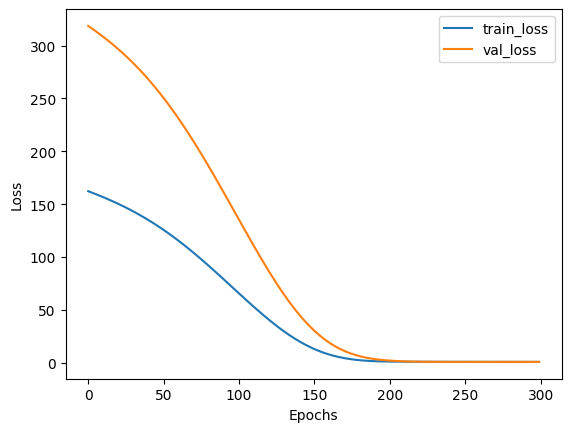

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
